### DNN_HW2

**Q6. Fashion mnist data bonus question**



In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers import BatchNormalization, AlphaDropout
from keras.callbacks import EarlyStopping

In [ ]:
#load the data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
#check the input data
print("Shape of X_train:",X_train.shape)
print("Shape of y_train:",y_train.shape)

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)


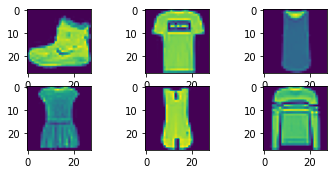

In [ ]:
#plot sample train images
fig = plt.figure()
for i in range(6):
    ax = fig.add_subplot(331 + i)
    ax.imshow(X_train[i])
    
plt.show()

In [ ]:
#convert to gray scale by normalizing the data to range [0,1]
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

#include the gray scale channel in input shape
input_shape = (28,28,1)

#define the number of target classes
tar_class = 10

#one hot encode the target class
y_train = to_categorical(y_train, tar_class)
y_test = to_categorical(y_test, tar_class)

In [ ]:
#check the shape train and test data
print("Shape of X_train:",X_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000, 10)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000, 10)


In [ ]:
#define parameters for the model
#input_dim = X_train.shape[1]
epochs = 50
validation_split = 0.1 

a. Build a DNN with 10 hidden layers of 30 neurons each. Use He initialization (see Géron A. Hands-on textbook p. 333) and the ELU activation function. Using Nadam optimization and early stopping(see https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/), train the network on this fashion MNIST dataset.



In [ ]:
#set seed to reproduce results
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

#defining model parameters
es = EarlyStopping(monitor = 'val_loss', mode = "auto", verbose=1, patience = 10)    #There are two He initialization in keras. I am using He normal as the code example 
optimizer = keras.optimizers.Nadam(lr = 0.0001, beta_1 = 0.9, beta_2 = 0.999)
initializer = keras.initializers.HeNormal(seed = 1)

#defining model layers
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
for layer in range(1,11):
    model.add(Dense(50, activation = "elu",kernel_initializer = initializer))
model.add(Dense(tar_class, activation = "softmax"))

model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2

In [ ]:
# Training the model 
history = model.fit(X_train, y_train,
                    epochs = epochs,
                    verbose = True,
                    shuffle = True,
                    validation_split = validation_split,
                    callbacks=[es])

Epoch 1/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.6707 - accuracy: 0.7639 - val_loss: 0.4793 - val_accuracy: 0.8222
Epoch 2/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4430 - accuracy: 0.8412 - val_loss: 0.4288 - val_accuracy: 0.8385
Epoch 3/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3966 - accuracy: 0.8585 - val_loss: 0.4042 - val_accuracy: 0.8515
Epoch 4/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3693 - accuracy: 0.8672 - val_loss: 0.3988 - val_accuracy: 0.8532
Epoch 5/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3494 - accuracy: 0.8738 - val_loss: 0.3645 - val_accuracy: 0.8687
Epoch 6/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3332 - accuracy: 0.8792 - val_loss: 0.3803 - val_accuracy: 0.8618
Epoch 7/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3224 - accuracy: 0.8827 - val_loss: 0.3604 - val_accuracy:

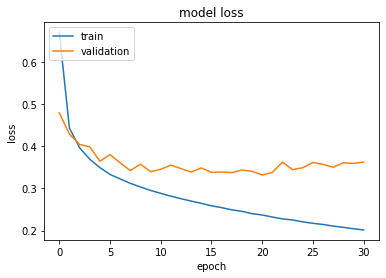

In [ ]:
#plot the train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Model evaluation on test data
score = model.evaluate(X_test, y_test, verbose = True)
print("Test loss: {:.4f}".format(score[0]))
print("Test accuracy: {:.2%}".format(score[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.3633 - accuracy: 0.8779
Test loss: 0.3633
Test accuracy: 87.79%


**This model has an accuracy of 87.79% and was trained for 31 epochs with training time of 4-5s for each epoch.**

b. Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

#model parameters
es = EarlyStopping(monitor = 'val_loss', mode = "auto", verbose = 1)
optimizer = keras.optimizers.Nadam(lr = 0.0001, beta_1 = 0.9, beta_2 = 0.999)
initializer = keras.initializers.HeNormal(seed = 1)

#define the model layers
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
for layer in range(1,11):
    model.add(Dense(50, activation = "elu",kernel_initializer = initializer))
    model.add(BatchNormalization())
model.add(Dense(tar_class, activation = "softmax"))

model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
batch_normalization_2 (Batch (None, 50)                2

In [ ]:
#train the model 
history = model.fit(X_train, y_train,
                    epochs = epochs,
                    verbose = True,
                    shuffle = True,
                    validation_split = validation_split,
                    callbacks=[es])

Epoch 1/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.8781 - accuracy: 0.7056 - val_loss: 0.5128 - val_accuracy: 0.8168
Epoch 2/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.5672 - accuracy: 0.8027 - val_loss: 0.4449 - val_accuracy: 0.8402
Epoch 3/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4917 - accuracy: 0.8284 - val_loss: 0.4077 - val_accuracy: 0.8517
Epoch 4/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4554 - accuracy: 0.8392 - val_loss: 0.4092 - val_accuracy: 0.8497
Epoch 00004: early stopping


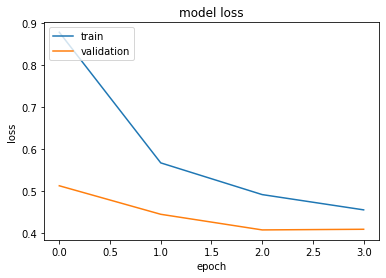

In [ ]:
#plot the train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model on test data
score = model.evaluate(X_test, y_test, verbose = True)
print("Test loss: {:.4f}".format(score[0]))
print("Test accuracy: {:.2%}".format(score[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.4244 - accuracy: 0.8448
Test loss: 0.4244
Test accuracy: 84.48%


Is it converging faster than before? Yes, the model took only 4 epochs as compared to the previous model which took 31 epochs. The model is several times more faster compared to original model.

Does it produce a better model? **Basically the original model has better accuracy.I have done some experiments with different learning_rate, number of epochs, batch_size, patience in early stoping but unfortunetly,  could not get accuracy more than the original model. Some experiments gave a bad learning curve and revert back the values.**

How does it affect training speed? The training speed is more for each epoch as compared to original model. This is because of the addition of Batch Normalization layers which results in extra computation time.

c. Try replacing Batch Normalization with SELU and make the necessary adjustments to ensure the network self-normalizes (i.e., standardize the input features).

In [ ]:
#standardize the input features by subtracting with mean and dividing with SD
X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

es = EarlyStopping(monitor = 'val_loss', mode = "auto", verbose = 1)
optimizer = keras.optimizers.Nadam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)
initializer = keras.initializers.LecunNormal(seed = 1)

#define the model layers
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
for layer in range(1,11):
    model.add(Dense(50, activation = "selu",kernel_initializer = initializer))
model.add(Dense(tar_class, activation = "softmax"))

model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2

In [ ]:
#train the model 
history = model.fit(X_train_scaled, y_train,
                    epochs = epochs,
                    verbose = True,
                    shuffle = True,
                    validation_split = validation_split,
                    callbacks=[es])

Epoch 1/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4985 - accuracy: 0.8213 - val_loss: 0.4138 - val_accuracy: 0.8492
Epoch 2/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3852 - accuracy: 0.8621 - val_loss: 0.4092 - val_accuracy: 0.8600
Epoch 3/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3501 - accuracy: 0.8730 - val_loss: 0.3792 - val_accuracy: 0.8707
Epoch 4/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3285 - accuracy: 0.8812 - val_loss: 0.3787 - val_accuracy: 0.8667
Epoch 5/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3109 - accuracy: 0.8876 - val_loss: 0.3628 - val_accuracy: 0.8720
Epoch 6/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2969 - accuracy: 0.8915 - val_loss: 0.3818 - val_accuracy: 0.8680
Epoch 00006: early stopping


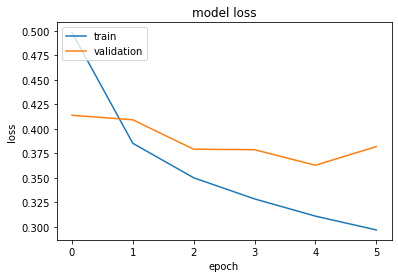

In [ ]:
#plot the train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model on test data
score = model.evaluate(X_test_scaled, y_test, verbose = True)
print("Test loss: {:.4f}".format(score[0]))
print("Test accuracy: {:.2%}".format(score[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.3933 - accuracy: 0.8631
Test loss: 0.3933
Test accuracy: 86.31%


**The model accuracy is 86.31 % which is less than the original model and training time for each epoch is also less compared to the Batch Normalization model where training time is 7 sec with number of epochs: 4 whereas for training on the data, this model took about 6 epochs.**

d. Try regularizing the model with some dropout and compare model performance.

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

#define the model layers
es = EarlyStopping(monitor = 'val_loss', mode = "auto", verbose = 1)
optimizer = keras.optimizers.Nadam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)
initializer = keras.initializers.LecunNormal(seed = 1)

model = Sequential()
model.add(Flatten(input_shape = (28,28)))
for layer in range(1,11):
  model.add(Dense(50, activation = "selu",kernel_initializer = initializer))
  model.add(AlphaDropout(0.1))
model.add(Dense(tar_class, activation = "softmax"))

model.compile(optimizer = "nadam",
              loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
alpha_dropout (AlphaDropout) (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
alpha_dropout_1 (AlphaDropou (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
alpha_dropout_2 (AlphaDropou (None, 50)                0

In [ ]:
#train the model 
history = model.fit(X_train_scaled, y_train,
                    epochs = epochs,
                    verbose = True,
                    shuffle = True,
                    validation_split = validation_split,
                    callbacks=[es])

Epoch 1/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.8801 - accuracy: 0.6783 - val_loss: 0.7730 - val_accuracy: 0.8055
Epoch 2/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6064 - accuracy: 0.7929 - val_loss: 0.6864 - val_accuracy: 0.8315
Epoch 3/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5345 - accuracy: 0.8249 - val_loss: 0.6827 - val_accuracy: 0.8422
Epoch 4/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5016 - accuracy: 0.8338 - val_loss: 0.6388 - val_accuracy: 0.8537
Epoch 5/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4724 - accuracy: 0.8448 - val_loss: 0.6710 - val_accuracy: 0.8528
Epoch 00005: early stopping


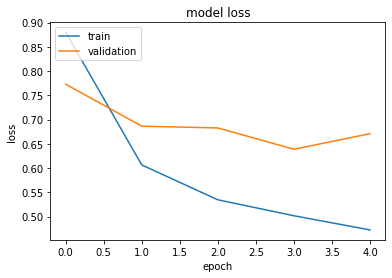

In [ ]:
#plot the train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model on test data
score = model.evaluate(X_test_scaled, y_test, verbose = True)
print("Test loss: {:.4f}".format(score[0]))
print("Test accuracy: {:.2%}".format(score[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.7469 - accuracy: 0.8426
Test loss: 0.7469
Test accuracy: 84.26%


**The model accuracy is 84.26% with dropout which is less than the original(87.79%) and the Batch Normalization (84.48%) models.**

e. Retrain your model using some learning rate scheduling, e.g., 1cycle scheduling, and to compare whether it improves training speed and model accuracy.

In [ ]:
#one cycle scheduler class
K = keras.backend

class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

#es = EarlyStopping(monitor = 'val_loss', mode = "auto", verbose = 1)
optimizer = keras.optimizers.Nadam(lr = 0.01, beta_1 = 0.9, beta_2 = 0.999)
initializer = keras.initializers.LecunNormal(seed = 1)

#define the model layers
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
for layer in range(1,11):
    model.add(Dense(50, activation = "selu",kernel_initializer = initializer))
model.add(Dense(tar_class, activation = "softmax"))

model.compile(optimizer = "nadam",
              loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2

In [ ]:
#train the model 
n_epochs = 50
batch_size = 128
onecycle = OneCycleScheduler(len(X_train_scaled) // batch_size * n_epochs, max_rate = 0.001)
history = model.fit(X_train_scaled, y_train,
                    epochs = n_epochs,
                    verbose = True,
                    shuffle = True,
                    batch_size = batch_size,
                    validation_split = validation_split,
                    callbacks = [onecycle])

Epoch 1/50
422/422 [==============================] - 2s 5ms/step - loss: 0.7985 - accuracy: 0.7285 - val_loss: 0.5018 - val_accuracy: 0.8210
Epoch 2/50
422/422 [==============================] - 2s 4ms/step - loss: 0.4549 - accuracy: 0.8387 - val_loss: 0.4211 - val_accuracy: 0.8468
Epoch 3/50
422/422 [==============================] - 2s 5ms/step - loss: 0.3951 - accuracy: 0.8595 - val_loss: 0.3965 - val_accuracy: 0.8530
Epoch 4/50
422/422 [==============================] - 2s 5ms/step - loss: 0.3603 - accuracy: 0.8707 - val_loss: 0.3871 - val_accuracy: 0.8613
Epoch 5/50
422/422 [==============================] - 2s 5ms/step - loss: 0.3366 - accuracy: 0.8789 - val_loss: 0.3652 - val_accuracy: 0.8668
Epoch 6/50
422/422 [==============================] - 2s 5ms/step - loss: 0.3169 - accuracy: 0.8852 - val_loss: 0.3627 - val_accuracy: 0.8680
Epoch 7/50
422/422 [==============================] - 2s 4ms/step - loss: 0.2997 - accuracy: 0.8904 - val_loss: 0.3499 - val_accuracy: 0.8742
Epoch 

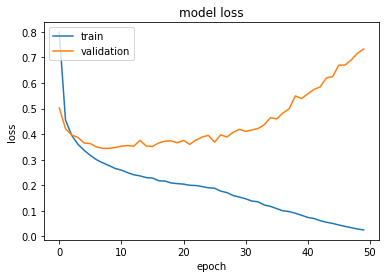

In [ ]:
#plot the train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model on test data
score = model.evaluate(X_test_scaled, y_test, verbose = True)
print("Test loss: {:.4f}".format(score[0]))
print("Test accuracy: {:.2%}".format(score[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.7801 - accuracy: 0.8765
Test loss: 0.7801
Test accuracy: 87.65%


**The model training time is 2s/epoch and accuracy is 87.65% which is better in compared to the other models. The original model has little bit higher accuracy(87.79%) than this model but number of epochs(50/50) for this model is more than the number of epochs(31/50) of original one. Here, In this model the validation loss is 0.7801 whereas for the original model the validation loss is 0.3633**
**I done some experiments  with early stoping as well, the model curve was good, but the accuracy is less than the original model**. 